In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes

In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('2024_tourism_data_utf8.csv', encoding="utf-8")
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [4]:
df

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4,5.0,1,1,7.0,NaN,NaN,NaN,...,2,5,1,4,1,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4,5.0,1,1,7.0,10.0,2.0,1.0,...,2,4,1,4,1,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3,5.0,1,1,7.0,2.0,8.0,1.0,...,2,3,1,3,1,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1,NaN,1,1,8.0,7.0,3.0,NaN,...,1,2,1,1,1,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4,5.0,1,1,2.0,9.0,10.0,4.0,...,2,2,1,4,1,876.796936,NaN,NaN,NaN,876.796936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,19273,2,2,5.0,1,1,5.0,4.0,7.0,1.0,...,2,4,1,2,1,NaN,NaN,NaN,1215.218286,1215.218286
16212,19274,2,2,5.0,1,1,9.0,2.0,7.0,5.0,...,1,4,1,2,1,NaN,NaN,NaN,1131.834751,1131.834751
16213,19275,1,1,NaN,1,1,5.0,7.0,NaN,NaN,...,2,5,1,1,1,NaN,NaN,NaN,1212.382353,1212.382353
16214,19277,2,2,5.0,1,1,2.0,4.0,6.0,NaN,...,1,5,1,2,1,NaN,NaN,NaN,1287.852779,1287.852779


In [5]:
cols = ['D_AGE', 'D_NAT', 'D_MON']
df_cluster = df[cols].fillna('0').astype(str)

km = KModes(n_clusters=4, init='Huang', n_init=5, random_state=42)
clusters = km.fit_predict(df_cluster)

df['cluster'] = clusters

print("군집별 대표값(centroids):")
print(km.cluster_centroids_)

print("\n군집별 데이터 개수:")
print(df['cluster'].value_counts())

df0 = df[df['cluster'] == 0].copy()
df1 = df[df['cluster'] == 1].copy()
df2 = df[df['cluster'] == 2].copy()
df3 = df[df['cluster'] == 3].copy()

print(f"Cluster 0 shape: {df0.shape}")
print(f"Cluster 1 shape: {df1.shape}")
print(f"Cluster 2 shape: {df2.shape}")
print(f"Cluster 3 shape: {df2.shape}")

군집별 대표값(centroids):
[['2' '1' '9']
 ['2' '2' '11']
 ['3' '3' '3']
 ['5' '4' '1']]

군집별 데이터 개수:
cluster
0    7789
2    3740
1    2745
3    1942
Name: count, dtype: int64
Cluster 0 shape: (7789, 403)
Cluster 1 shape: (2745, 403)
Cluster 2 shape: (3740, 403)
Cluster 3 shape: (3740, 403)


In [6]:
df0.to_csv('cluster_0.csv', index=False, encoding='utf-8-sig')
df1.to_csv('cluster_1.csv', index=False, encoding='utf-8-sig')
df2.to_csv('cluster_2.csv', index=False, encoding='utf-8-sig')
df3.to_csv('cluster_3.csv', index=False, encoding='utf-8-sig')

In [7]:
q8_ratio = df0['Q8_1a1'].value_counts(normalize=True) * 100
q8_ratio = q8_ratio.sort_values(ascending=False).head(5)
q8_ratio = q8_ratio.round(2)
print(q8_ratio)

Q8_1a1
2     18.04
1     14.67
3     13.47
5     11.93
18     5.92
Name: proportion, dtype: float64


In [8]:
q8_ratio = df1['Q8_1a1'].value_counts(normalize=True) * 100
q8_ratio = q8_ratio.sort_values(ascending=False).head(5)
q8_ratio = q8_ratio.round(2)
print(q8_ratio)

Q8_1a1
1     24.48
2     16.76
5      9.47
18     8.71
3      8.09
Name: proportion, dtype: float64


In [9]:
q8_ratio = df2['Q8_1a1'].value_counts(normalize=True) * 100
q8_ratio = q8_ratio.sort_values(ascending=False).head(5)
q8_ratio = q8_ratio.round(2)
print(q8_ratio)

Q8_1a1
2     17.65
1     15.53
5     13.96
3     12.78
18     9.65
Name: proportion, dtype: float64


In [10]:
q8_ratio = df3['Q8_1a1'].value_counts(normalize=True) * 100
q8_ratio = q8_ratio.sort_values(ascending=False).head(5)
q8_ratio = q8_ratio.round(2)
print(q8_ratio)

Q8_1a1
5     14.83
1     14.73
2     14.42
18    13.03
3     12.87
Name: proportion, dtype: float64


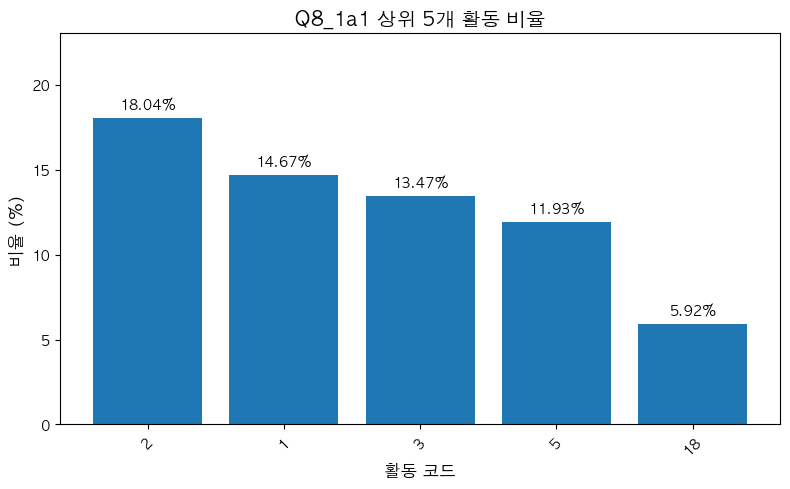

In [ ]:

q8_ratio = df0['Q8_1a1'].value_counts(normalize=True) * 100
q8_ratio = q8_ratio.sort_values(ascending=False).head(5)
q8_ratio = q8_ratio.round(2)

plt.figure(figsize=(8, 5))
plt.bar(q8_ratio.index.astype(str), q8_ratio.values)
plt.title('Q8_1a1 상위 5개 활동 비율', fontsize=14)
plt.xlabel('활동 코드', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, q8_ratio.max() + 5)

for i, val in enumerate(q8_ratio.values):
    plt.text(i, val + 0.5, f"{val:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

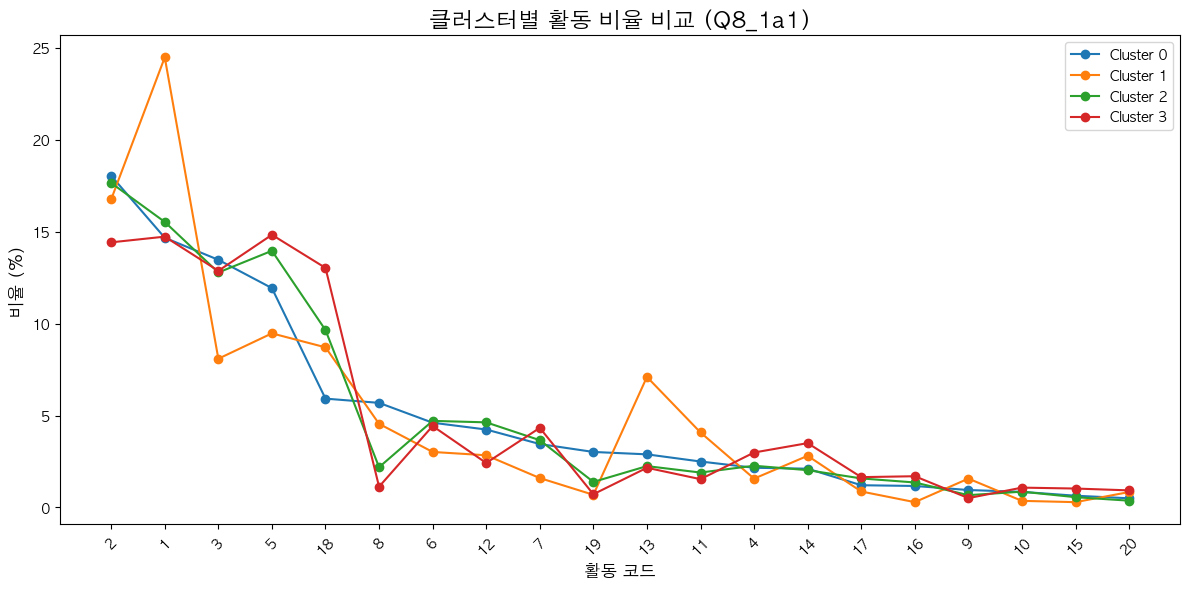

In [ ]:
clusters = [df0, df1, df2, df3]
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

activity_ratios = pd.DataFrame()

for i, d in enumerate(clusters):
    ratio = d['Q8_1a1'].value_counts(normalize=True) * 100
    ratio = ratio.round(2)
    activity_ratios[cluster_names[i]] = ratio

activity_ratios = activity_ratios.fillna(0)

activity_ratios.index = activity_ratios.index.astype(str)

plt.figure(figsize=(12, 6))
for cluster in cluster_names:
    plt.plot(activity_ratios.index, activity_ratios[cluster], marker='o', label=cluster)

plt.title('클러스터별 활동 비율 비교 (Q8_1a1)', fontsize=16)
plt.xlabel('활동 코드', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


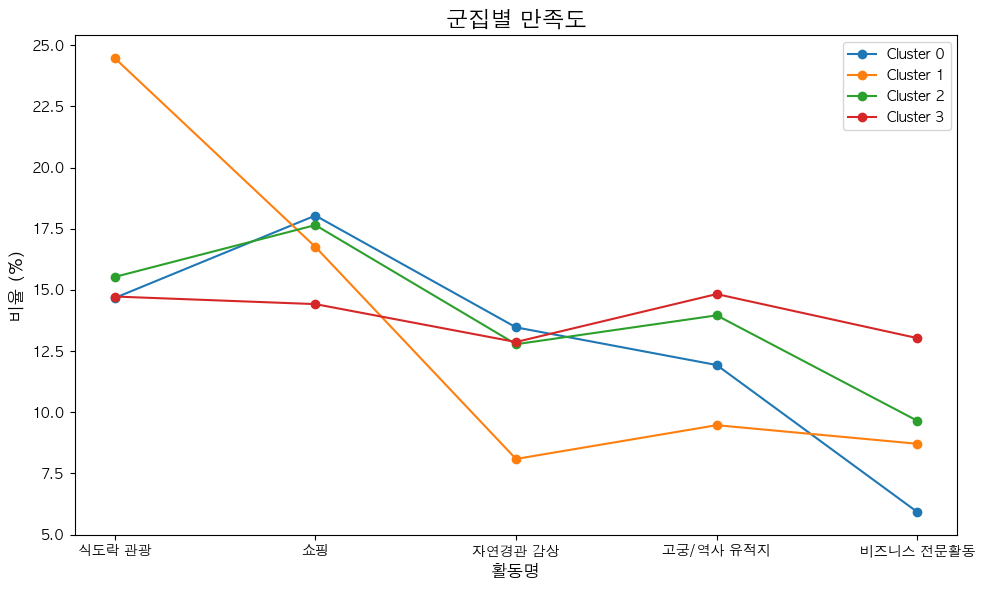

In [ ]:
activity_map = {
    1: '식도락 관광',
    2: '쇼핑',
    3: '자연경관 감상',
    5: '고궁/역사 유적지',
    18: '비즈니스 전문활동'
}

selected_codes = [1, 2, 3, 5, 18]

clusters = [df0, df1, df2, df3]
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

activity_ratios = pd.DataFrame()

for i, d in enumerate(clusters):
    ratio = d['Q8_1a1'].value_counts(normalize=True) * 100
    ratio = ratio.round(2)
    activity_ratios[cluster_names[i]] = ratio


activity_ratios = activity_ratios.fillna(0)

activity_ratios = activity_ratios.loc[selected_codes]
activity_ratios.index = activity_ratios.index.map(activity_map)

plt.figure(figsize=(10, 6))
for cluster in cluster_names:
    plt.plot(activity_ratios.index, activity_ratios[cluster], marker='o', label=cluster)

plt.title('군집별 만족도', fontsize=16)
plt.xlabel('활동명', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
